## Funciones de Distribución de probabilidades

Las veces que ocurre una **variable aleatoria** para un número en concreto se llama Función de Distribución de Probabilidad (PDF->Probability Density Function), es decir que tome un valor exacto.

Función de Distribución Acumulativa (CDF -> Cumulative Density Function) se trata la probabilidad que una variable aleatoria sea menor o igual a un valor concreto.

Las funciones mas conocidas son:
* **_La curva Normal (campana de Gauss)_** 
* **_La distribución uniforme_**
* De Poisson
* La binomial 
* La multinomial


## La distribución Uniforme
Es aquella en que se tienen 2 puntos y la probabilidad de que ocurra algo entre esos dos puntos siempre es la misma

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
a = 1
b = 100
n = 1000000
data = np.random.uniform(a, b, n)

(array([100255., 100350.,  99622.,  99701., 100116.,  99698., 100122.,
        100231., 100464.,  99441.]),
 array([ 1.00021225, 10.9001845 , 20.80015674, 30.70012899, 40.60010123,
        50.50007347, 60.40004572, 70.30001796, 80.1999902 , 90.09996245,
        99.99993469]),
 <BarContainer object of 10 artists>)

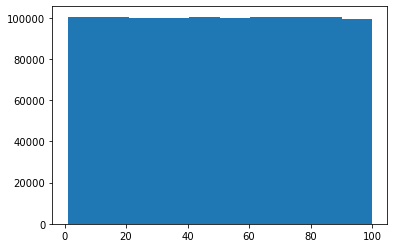

In [3]:
%matplotlib inline
plt.hist(data)

## La campana de Gauss
### Distribución Normal

In [4]:
data = np.random.randn(1000000) ##randn no crea numeros aleatorios en distribución normal standar con la media cero y la desviación tipica 1

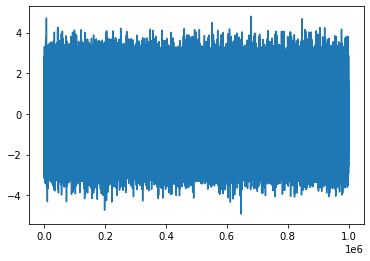

In [5]:
x = range(1,1000001)
plt.plot(x, data)

(array([3.80000e+01, 1.45500e+03, 2.12840e+04, 1.28981e+05, 3.25973e+05,
        3.42348e+05, 1.50294e+05, 2.74510e+04, 2.10200e+03, 7.40000e+01]),
 array([-4.91784156, -3.94538977, -2.97293799, -2.0004862 , -1.02803441,
        -0.05558262,  0.91686916,  1.88932095,  2.86177274,  3.83422453,
         4.80667631]),
 <BarContainer object of 10 artists>)

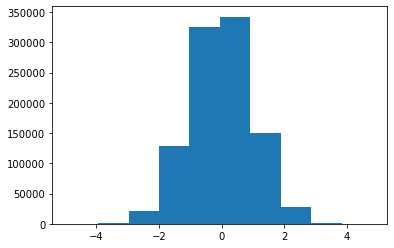

In [6]:
plt.hist(data)

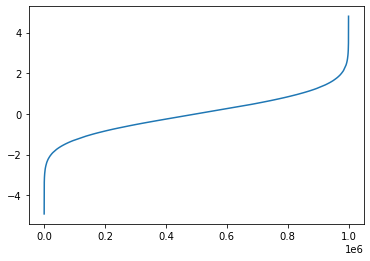

In [7]:
plt.plot(x,sorted(data)) ## forma de distribución acumulada d ela campna de gauss. Con sorted se ordenan los datos para este tipod e grafico

(array([  15.,  153.,  678., 1848., 2938., 2586., 1319.,  399.,   57.,
           7.]),
 array([-3.68370794, -1.75787911,  0.16794972,  2.09377856,  4.01960739,
         5.94543622,  7.87126505,  9.79709388, 11.72292271, 13.64875154,
        15.57458037]),
 <BarContainer object of 10 artists>)

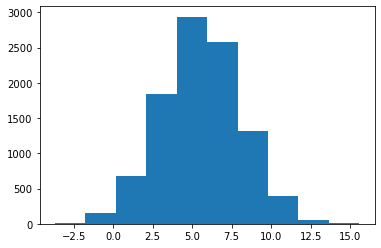

In [8]:
mu = 5.5 # mi propia media
sd = 2.5 # mi propia desviación estandar
data = mu + sd*np.random.randn(10000) # Z = (X - mu) / sd -> N(0,1), X = mu + sd * Z
plt.hist(data)

In [9]:
data = np.random.randn(2,4)  ## Te genera dos muestras (arrays) de tamaño 4
data

array([[-0.81076425, -1.21092236, -0.63584244,  2.19579561],
       [ 0.60976676, -0.28891679,  0.12814412,  0.61023491]])

## La simulación de Monte Carlo

* Generamos dos número aleatorios uniformes x e y entre 0 y 1 en total 1000 veces
* Calcularemos x^2 + y^2
* Si el valor es inferior a 1 -> estamos dentro del círculo
* Si el valor es superior a 1 -> estamos fuera del círculo
* Calculamos el número total de veces que están dentro del círculo y lo dividimos entre el número total de intentos poara obtener una aproximación d ela probabilidad de caer dentro del círculo.
* Usamos dicha probabilidad para aproximar el valor de π.
* Repetimos el experimento un número suficiente de veces ( por ejejmplo 100), para obtener (100) diferentes aproximaciones de π.
* Calculamos el promedioo de los 100 experimentos anteriores para dar un valor fina π.

In [10]:
def pi_montecarLo(n, n_exp):
    pi_avg = 0
    pi_value_list = []
    for i in range(n_exp):
        value = 0
        x = np.random.uniform(0,1,n).tolist()
        y = np.random.uniform(0,1,n).tolist()
        for j in range(n):
            z = np.sqrt(x[j] * x[j] + y[j] * y[j])
            if z<=1:
                value += 1
        float_value = float(value)
        pi_value = float_value * 4 / n
        pi_value_list.append(pi_value)
        pi_avg += pi_value

    pi = pi_avg/n_exp

    print(pi)
    fig = plt.plot(pi_value_list)
    return (pi, fig)

3.141607999999997


(3.141607999999997, [<matplotlib.lines.Line2D at 0x7fe4e6b5cb20>])

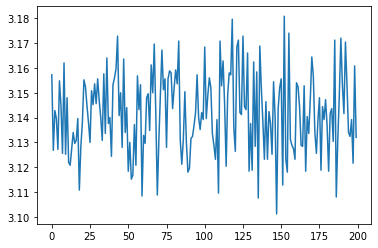

In [11]:
pi_montecarLo(10000, 200)

### Dummy Data Sets

In [12]:
n = 1000000
data = pd.DataFrame({
    'A' : np.random.randn(n),
    'B' : 1.5 + 2.5 * np.random.randn(n),
    'C' : np.random.uniform(5, 32, n)
})

In [13]:
data.describe()

,A,B,C
count,1000000.000000,1000000.000000,1000000.000000
mean,0.000814,1.504488,18.503139
std,0.999567,2.499323,7.791927
min,-4.463834,-11.775212,5.000010
25%,-0.673733,-0.183076,11.751190
50%,0.000830,1.504129,18.513496
75%,0.675129,3.191019,25.254585
max,4.644986,13.720818,31.999996


(array([1.77000e+02, 4.03000e+03, 3.74440e+04, 1.64085e+05, 3.29901e+05,
        3.05991e+05, 1.30431e+05, 2.55470e+04, 2.29100e+03, 1.03000e+02]),
 array([-4.46383396, -3.55295201, -2.64207006, -1.73118812, -0.82030617,
         0.09057578,  1.00145773,  1.91233967,  2.82322162,  3.73410357,
         4.64498552]),
 <BarContainer object of 10 artists>)

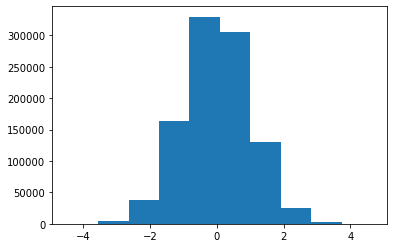

In [14]:
plt.hist(data['A'])

(array([1.10000e+01, 4.89000e+02, 1.16760e+04, 9.69980e+04, 3.06516e+05,
        3.74299e+05, 1.76236e+05, 3.15180e+04, 2.21900e+03, 3.80000e+01]),
 array([-11.77521156,  -9.2256086 ,  -6.67600565,  -4.12640269,
         -1.57679973,   0.97280322,   3.52240618,   6.07200913,
          8.62161209,  11.17121504,  13.720818  ]),
 <BarContainer object of 10 artists>)

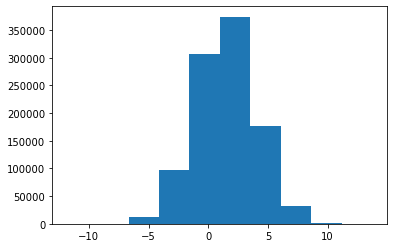

In [15]:
plt.hist(data['B'])

(array([ 99624., 100038., 100400.,  99973.,  99515., 100300., 100110.,
         99899., 100122., 100019.]),
 array([ 5.00001002,  7.70000862, 10.40000722, 13.10000582, 15.80000442,
        18.50000303, 21.20000163, 23.90000023, 26.59999883, 29.29999744,
        31.99999604]),
 <BarContainer object of 10 artists>)

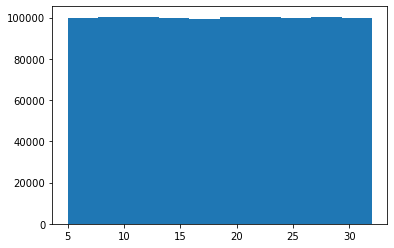

In [16]:
plt.hist(data['C'])

In [17]:
data = pd.read_csv('../datasets/customer-churn-model/Customer Churn Model.txt')

In [18]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [19]:
colum_names = data.columns.values.tolist()

In [20]:
a = len(colum_names)
a

21

In [23]:
new_data = pd.DataFrame(
{
    'Column Name' : colum_names,
    'A' : np.random.randn(a),
    'B' : np.random.uniform(0,1,a)
}, index = range(42, 42 + a) ## Si deseo que comience la numeración de l index en 42
)

In [24]:
new_data

,Column Name,A,B
42,State,0.371038,0.929598
43,Account Length,-1.375557,0.893105
44,Area Code,0.996106,0.131261
45,Phone,0.447367,0.809480
46,Int'l Plan,-0.307010,0.500604
47,VMail Plan,-0.284467,0.737784
48,VMail Message,0.183813,0.048358
49,Day Mins,-1.200805,0.793610
50,Day Calls,-1.393460,0.733812
51,Day Charge,1.114236,0.884685
